<a href="https://colab.research.google.com/github/Soot3/Submissions/blob/master/FoodTrendsAfrica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Decade in African Food Production and Consumption

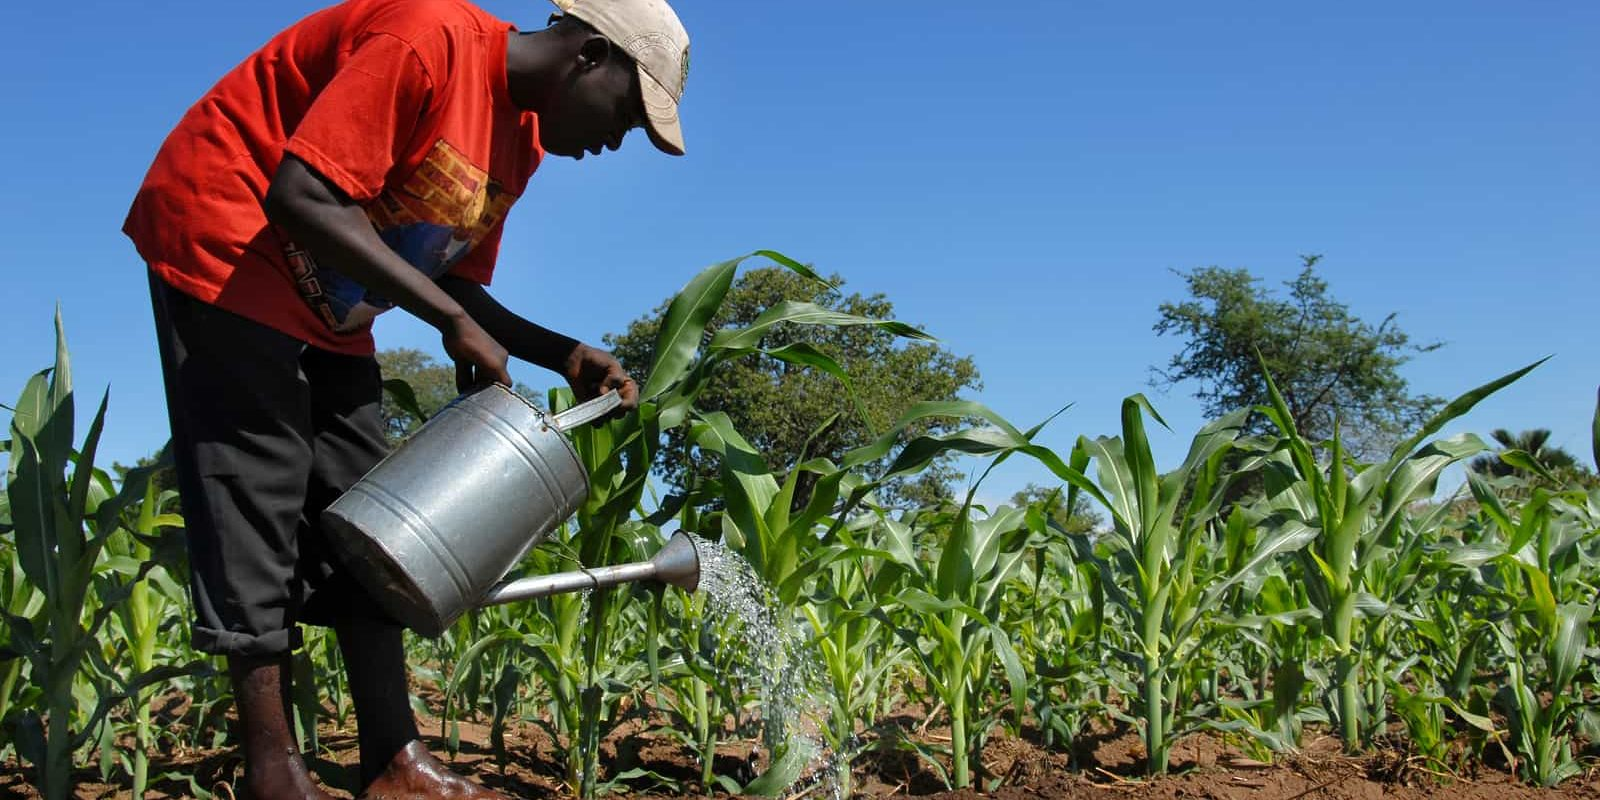

As the world population continues to increase and economies flunctuate, predictions on food security across socio-economic classes get dire, as such the particulars around Food and Agriculture become more important to a country's agenda, especially in Africa.

In this report, we take a look at exising data on African food production and consumption over a decade (2004-2013), with the aim of exploring trends and gaining insights into areas that can be improved.

## Data Preparation

The datasets used include csv files on African [food production](https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Production%20(2004%20-%202013).csv) and [food consumption](https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Supply%20(2004%20-%202013).csv), as well as [population data](http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv) for analysis purposes. 
*Data containing [country codes](https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv) was also used for proper mapping*

In [1]:
# Reading in food production data
import pandas as pd
prod_data = pd.read_csv('https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Production%20(2004%20-%202013).csv')

# Renaming ambigious columns
prod_data.rename(columns={'Item':'Products','Value':'Quantity Produced'}, inplace=True) 
prod_data.head()

,Country,Products,Year,Quantity Produced
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [2]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            23110 non-null  object
 1   Products           23110 non-null  object
 2   Year               23110 non-null  int64 
 3   Quantity Produced  23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [3]:
prod_data.describe(include='all')

,Country,Products,Year,Quantity Produced
count,23110,23110,23110.000000,23110.000000
unique,45,94,NaN,NaN
top,United Republic of Tanzania,"Offals, Edible",NaN,NaN
freq,790,450,NaN,NaN
mean,NaN,NaN,2008.498269,327.785201
std,NaN,NaN,2.871740,1607.940343
min,NaN,NaN,2004.000000,0.000000
25%,NaN,NaN,2006.000000,3.000000
50%,NaN,NaN,2008.000000,18.000000
75%,NaN,NaN,2011.000000,108.000000


From the initial exploration into the food production dataset, we see it contains over twenty-three thousand (23110) entries with four (4) columns detailing forty-five (45) countries, the items they produced, the year it was produced and in what quantities. We can also confirm that it covers the range of ten (10) years (2004-2013). There are no null values in the dataset.

In [4]:
# Reading in consumption data
cons_data = pd.read_csv('https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Supply%20(2004%20-%202013).csv')

# Renaming columns
cons_data.rename(columns={'Value':'Quantity Consumed'}, inplace=True)
cons_data.head()

,Country,Year,Quantity Consumed
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [5]:
cons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            450 non-null    object
 1   Year               450 non-null    int64 
 2   Quantity Consumed  450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [6]:
cons_data.describe(include='all')

,Country,Year,Quantity Consumed
count,450,450.000000,450.000000
unique,45,NaN,NaN
top,Ghana,NaN,NaN
freq,10,NaN,NaN
mean,NaN,2008.500000,2469.775556
std,NaN,2.875478,379.140143
min,NaN,2004.000000,1781.000000
25%,NaN,2006.000000,2174.000000
50%,NaN,2008.500000,2376.000000
75%,NaN,2011.000000,2681.750000


Initial exploration of the food consumption dataset shows no null values, with four hundred and fifty (450) entries across all three columns. The data contains forty-five (45) contries and their food consumption across a decade (2004 - 2013).

*Note*

Both of our main datasets contain data on forty-five (45) countries, however there are fifty-four countries in Africa. Therefore, there are nine countries missing from both datasets.

In [7]:
# Locating the missing countries
for i in ['Algeria','Angola', 'Benin','Botswana','Burkina Faso','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Camoros','Democratic Republic of the Congo','Republic of the Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea-Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe']:
  if i not in prod_data['Country'].unique():
    print(i)

Burundi
Cape Verde
Camoros
Democratic Republic of the Congo
Republic of the Congo
Equatorial Guinea
Eritrea
Ivory Coast
Libya
Seychelles
Somalia
South Sudan
Tanzania


Cape Verde, Democratic Republic of the Congo, Ivory Coast and Tanzania are all cases of alternate spelling errors while the remaining nine including Republic of the Congo are missing from the datasets.   

In [8]:
# Reading in population data
pop_data = pd.read_csv('/content/API_SP.POP.TOTL_DS2_en_csv_v2_1308146.csv', skiprows=3)
pop_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN


In order to effectively merge the population data across 2014 - 2013, this dataset needs to transposed and split into the relevant columns showcasing the country name, the year and the population during that year.

In [9]:
# Isolatting the relevant columns
pop_data = pop_data[['Country Name', '2004', '2005','2006','2007','2008','2009','2010','2011','2012','2013']]
# Transposing the data
pop_data = pop_data.melt(id_vars=['Country Name'], var_name='Year')

pop_data.rename(columns={'value':'Population'}, inplace=True) 
pop_data.head()

,Country Name,Year,Population
0,Aruba,2004,98737.0
1,Afghanistan,2004,24726684.0
2,Angola,2004,18758145.0
3,Albania,2004,3026939.0
4,Andorra,2004,76244.0


In [10]:
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  2640 non-null   object 
 1   Year          2640 non-null   object 
 2   Population    2628 non-null   float64
dtypes: float64(1), object(2)
memory usage: 62.0+ KB


In [11]:
# Reading in country codes data
country_codes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

country_codes = country_codes.drop(columns='GDP (BILLIONS)') # Dropping irrelevant columns
country_codes.head()

,COUNTRY,CODE
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND


In [12]:
# Standardizing Country Names
country_codes.iloc[73]['COUNTRY'] = 'Gambia'
country_codes.iloc[34]['COUNTRY'] = 'Cape Verde'
country_codes.iloc[45]['COUNTRY'] = 'Congo'
country_codes.iloc[49]['COUNTRY'] = 'Ivory Coast'
prod_data['Country'] = prod_data['Country'].replace(["Cote d'Ivoire"], 'Ivory Coast')
prod_data['Country'] = prod_data['Country'].replace(['United Republic of Tanzania'],'Tanzania')
prod_data['Country'] = prod_data['Country'].replace(['Cabo Verde'],'Cape Verde')
cons_data['Country'] = cons_data['Country'].replace(["Cote d'Ivoire"], 'Ivory Coast')
cons_data['Country'] = cons_data['Country'].replace(['United Republic of Tanzania'],'Tanzania')
cons_data['Country'] = cons_data['Country'].replace(['Cabo Verde'],'Cape Verde')
pop_data['Country Name'] = pop_data['Country Name'].replace(['Congo, Dem. Rep.'],'Congo')
pop_data['Country Name'] = pop_data['Country Name'].replace(['Gambia, The'], 'Gambia')
pop_data['Country Name'] = pop_data['Country Name'].replace(['Cabo Verde'], 'Cape Verde')
pop_data['Country Name'] = pop_data['Country Name'].replace(['Egypt, Arab Rep.'], 'Egypt')
pop_data['Country Name'] = pop_data['Country Name'].replace(["Cote d'Ivoire"], 'Ivory Coast')
pop_data['Country Name'] = pop_data['Country Name'].replace(["Eswatini"], 'Swaziland')

## **Data Analysis**


Food security, that is access to sufficient, safe, and nutritious food that meets food preferences and dietary needs, is an important challenge in Africa as the continent has one of the highest number of malnourished individuals. This is a factor that has long term consequences, stifling growth and staggering economies. 

While there have been global gains in food production but this improvement has not led to a significant change in food security in Africa. Food security is not just about supply matching demand. The development of agricultural and food systems must take into account the progressive depletion of fossil energy, the protection of soil and water resources, the preservation of biodiversity and the issue of climate change.
 
 
 As a region with the potential to feed the world but still relies on food imports, the development of Africa can be said to be a global issue. [[1](https://www.afdb.org/fileadmin/uploads/afdb/Documents/Generic-Documents/%E2%80%9CBetting_on_Africa_to_Feed_the_World%E2%80%9D_-_The_Norman_Borlaug_Lecture_delivered_by_Dr._Akinwumi_A._Adesina__President_of_the_African_Development_Bank_and_World_Food_Prize_Laureate_2017.pdf)]

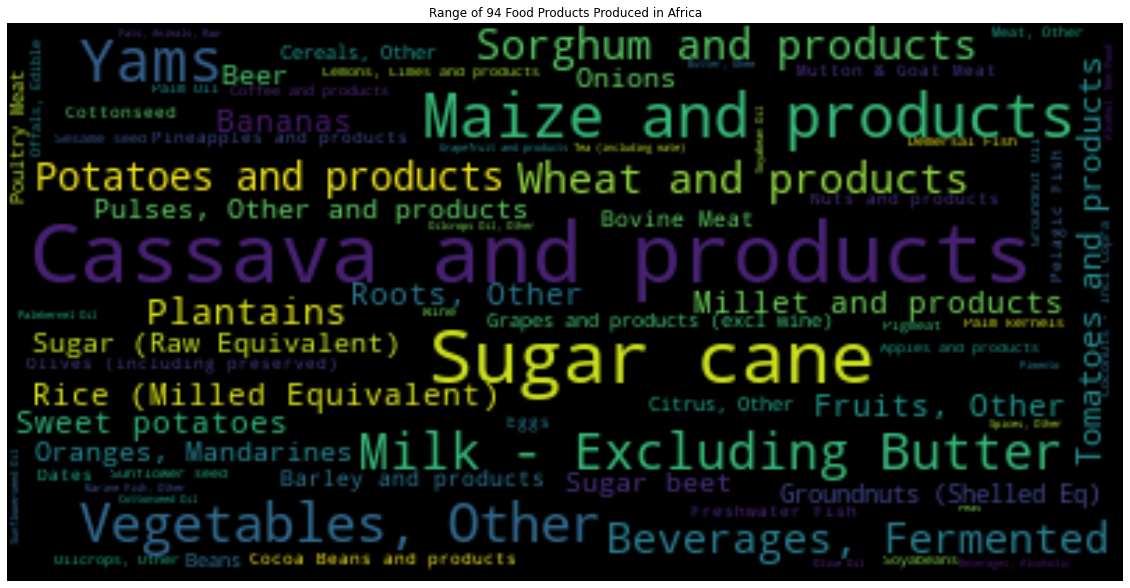

In [13]:
products = prod_data.groupby(['Products'], as_index=False)['Quantity Produced'].sum()
dict_ = {}
for a, x in products.values:
    dict_[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=dict_)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Range of 94 Food Products Produced in Africa')
plt.show()

Africa is a large continent with a variety of climates such as the equatorial climate, the tropical wet and dry climate, the tropical monsoon climate, the semi-arid climate (semi-desert and steppe), the desert climate (hyper-arid and arid), and the subtropical highland climate. About 60% of Africa's landmass is arable, these facts lead to a wide bounty of food products that can be found here. 

Most products in the visualization above end with 'and products' refering to the many derivates that can be gotten from one main resource. For example, Cassava is the basis of a multitude of products, including food, flour, animal feed, alcohol, starches for sizing paper and textiles, sweeteners, prepared foods and bio-degradable products. [[2](https://www.arc.agric.za/arc-iic/Pages/Cassava.aspx#:~:text=Cassava%20is%20the%20basis%20of,roots%20to%20modified%20cassava%20starch.)]

In [14]:
# Importing plotting package
import plotly.express as px
import plotly.io as pio
pio.templates.default = "presentation" # Set visualization template

In [15]:
# Visualizing the quantity of food products over the years
products_by_years = prod_data.groupby(['Products', 'Year'],as_index=False)['Quantity Produced'].sum()
px.line(products_by_years, x='Year', y='Quantity Produced', color='Products', color_discrete_sequence=px.colors.qualitative.Alphabet, title='Food products produced over a decade')

In [16]:
# Top 10 food products
shortened_vis = products_by_years.copy()
for i in shortened_vis['Products'].unique():
  if i not in ['Potatoes and products','Beverages, Fermented','Wheat and products','Sorghum and products','Milk - Excluding Butter','Vegetables, Other','Yams','Maize and products',	'Sugar cane', 'Cassava and products']:
    shortened_vis = shortened_vis[shortened_vis['Products'] != i]

px.line(shortened_vis, x='Year', y='Quantity Produced', color='Products', color_discrete_sequence=px.colors.qualitative.Alphabet, title='Top 10 Food products produced over a decade')

Note: *Hover over above the years to see the products ranked up* 

The above visualization shows 10 food products that are above the pack in terms of production in Africa, consistently adding up to about twenty thousand (20,000) units and above from all African countries over the years. Cassava and cassava products as well as sugar cane are being produced significantly more than other products in Africa.

In [17]:
# Alternate visualization using mean quantity produced
products_by_years1 = prod_data.groupby(['Products', 'Year'],as_index=False)['Quantity Produced'].mean()
px.line(products_by_years1, x='Year', y='Quantity Produced', color='Products', color_discrete_sequence=px.colors.qualitative.Alphabet, labels={'Quantity Produced':'Mean Quantity Produced'}, title='Mean Quantity of Food products produced over a decade')

Note: *Hover above the years to see the products ranked*

Cassava and its products are still dominantly produced, calling attention to the high level of productivity in that area of food production. Sugar beets is a new entry to the top food products showing that on average the commercial production of sugar ranks high in Africa.

### Trends in Food Production and Consumption

A quantitative increase in food production might produce a positive change on the level of food security, however there are other variables to this relationship, as market demand changes, price, enviromental issues and government policies have a significant effect. [[3](https://opinion.premiumtimesng.com/2020/08/22/nigerias-wildly-leaping-food-inflation-by-cheta-nwanze/)]

Poverty is a principal cause of hunger, and hunger is a major cause of poverty and under-nutrition, this interplay while simple or obvious has led to a significant portion of malnutrition in Africa. Eating or consumption patterns should also be a concern, while there is a relative convergence of eating diets, there are sustainability questions to be dealt with. The adoption of a westernized pattern of food consumption that calls for increasingly processed and sophisticated products leads to losses and excess waste [[4](https://agricultureandfoodsecurity.biomedcentral.com/articles/10.1186/2048-7010-1-13)] 
 

In [18]:
quantity_produced = prod_data.groupby(['Year'], as_index=False)['Quantity Produced'].sum()
quantity_consumed = cons_data.groupby(['Year'], as_index=False)['Quantity Consumed'].sum()

In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Quantity Produced over The Years","Quantity Consumed over The Years"))

fig.add_trace(go.Scatter(x=quantity_produced['Year'], y=quantity_produced['Quantity Produced']),
                 row=1, col=1)
fig.add_trace(go.Scatter(x=quantity_consumed['Year'], y=quantity_consumed['Quantity Consumed']),
                 row=1, col=2)


fig.update_layout(showlegend=False, title_text="Food Production and Consumption over The Years", height=600)
fig.show()

Both food consumption and food production can be seen to trending upward, with some dips in food production (2007 and 2009) which can be tentatively attributed to a food price crisis, droughts and other influencial variables. 2010 saw a return to the orginal food production trend line. 
[[5](https://en.wikipedia.org/wiki/2007%E2%80%932008_world_food_price_crisis)]


In [20]:
# Alternate Visualization using means
quantity_produced_avg = prod_data.groupby(['Year'], as_index=False)['Quantity Produced'].mean()
quantity_consumed_avg = cons_data.groupby(['Year'], as_index=False)['Quantity Consumed'].mean()

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Quantity Produced over The Years","Quantity Consumed over The Years"))

fig.add_trace(go.Scatter(x=quantity_produced_avg['Year'], y=quantity_produced_avg['Quantity Produced']),
                 row=1, col=1, )
fig.add_trace(go.Scatter(x=quantity_consumed_avg['Year'], y=quantity_consumed_avg['Quantity Consumed']),
                 row=1, col=2)


fig.update_layout(showlegend=False, title_text="Average Food Production and Consumption over The Years", height=600)
fig.show()

In [21]:
# Plotting a Box Plot of Food Production over the years in African Countries
country_produce = prod_data.groupby(['Country', 'Year'], as_index=False)['Quantity Produced'].sum()
fig = px.box(country_produce, x="Year", y="Quantity Produced", color='Year', hover_name='Country', title='Box Plot of Food Production in Africa over the years')
fig.show()

Note: *Hover over outliers for indepth info*

All outliers over the years have been from Nigeria, Egypt and South Africa, this shows a significant dominance by the three countries when it comes to food production. It should be noted that these three have the highest Gross Domestic Product (GDP) in Africa as a sign of their dominant economies in Africa. [[6](https://www.worldbank.org/en/region/afr/overview)]

In [22]:
# Alternative Boxplot with the mean
fig = go.Figure()
fig.add_trace(go.Box(y=country_produce['Quantity Produced'], x=country_produce['Year'],boxmean=True))
fig.update_layout(title='Box Plot of Food Production in Africa over the years (+ Mean)')
fig.show()

The averages over the decade can be seen to be boosted by the dominant outliers pushing them closer to the 3rd percentile. 

In [23]:
# Box plot of food consumption
country_consum = cons_data.groupby(['Country', 'Year'], as_index=False)['Quantity Consumed'].mean()
px.box(country_consum, x='Year', y='Quantity Consumed', color='Year', hover_name='Country', labels={'Quantity Consumed':'Mean Quantity Consumed'}, title='Box Plot of Food Consumption in Africa over the years')

From the above boxplot, we see that Egypt was a significant outlier in most years showing their dominance in food consumption and indirectly food security in Africa. 

In [24]:
# Animating food consumption over the years in Africa
fig = px.scatter(country_consum, x='Quantity Consumed', y='Country', text='Country', animation_frame='Year', title='Food Consumption by Countries over the years', labels={'Country':''}, height=600)
fig.update_layout(autosize=True)
fig.show()

Note: *Click the auto-scale at the top-right of the visualization after one run-through for better viewing*


In this visualization, we look into the food consumption of the countries in Africa over a decade, as seen in the previous plot, Egypt has the highest food consumption in Africa, Morocco and Tunisia have also been consistently dominant in this aspect.

In [25]:
# Animation of Food Production over the years
fig = px.scatter(country_produce, x='Quantity Produced', y='Country', text='Country', animation_frame='Year', title='Food Production by Countries over the years', labels={'Country':''}, height=600)
fig.update_layout(autosize=True)
fig.show()

Note: *Click the auto-scale at the top-right of the visualization after one run-through for better viewing*

With this animation, it is easier to see the cluster of African countries that are at the bottom in terms of food production despite a potential for large scale agriculture in these countries, there is relatively little improvement over the years

In [26]:
prod_ccodes = country_produce.merge(country_codes, how='left', left_on='Country', right_on='COUNTRY')
prod_ccodes.drop(columns=['COUNTRY'], inplace=True)
prod_ccodes.head()

,Country,Year,Quantity Produced,CODE
0,Algeria,2004,15536,DZA
1,Algeria,2005,15667,DZA
2,Algeria,2006,16417,DZA
3,Algeria,2007,14763,DZA
4,Algeria,2008,13841,DZA


In [27]:
# Mapping Food Production over the years
px.choropleth(prod_ccodes, locations='CODE',scope='africa',animation_frame='Year', title='Food Production over the years', color='Quantity Produced', hover_name='Country', height=600)

### Correlating with population

When looking at the variables involved in adequate food production and consumption, we can say that the country's population is an influence that can either hinder or encourage growth. Rapid population growth, as can be seen in Africa, can be a mountain of weight on the economy if not harnessed properly 

In [28]:
# Merging food production and population data
pop_data['Year'] = pop_data['Year'].astype(int)
pop_combo = pd.merge(country_produce, pop_data, how='left', left_on=['Country', 'Year'], right_on=['Country Name','Year'])
pop_combo.drop(columns=['Country Name'], inplace=True)
pop_combo.head()

,Country,Year,Quantity Produced,Population
0,Algeria,2004,15536,32692163.0
1,Algeria,2005,15667,33149724.0
2,Algeria,2006,16417,33641002.0
3,Algeria,2007,14763,34166972.0
4,Algeria,2008,13841,34730608.0


In [29]:
test = pop_combo.groupby(['Year'])['Quantity Produced', 'Population'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [30]:
# Importing statistical package
from scipy import stats
stats.pearsonr(test['Quantity Produced'],test['Population']) # Testing the correlation between food production and population

(0.9858196279382946, 1.73907831956088e-07)

The pearson correlation carried out showed a significantly high correlation between food production and population. This confirms the relationship between the two variables and their positive interplay, when food production increases population increases and vice versa.

In [31]:
# Visualizing the Mean Food production against the Country's Mean Population
mean_quant_pop = pop_combo.groupby(['Country'], as_index=False)['Quantity Produced', 'Population'].mean()
fig = px.scatter(mean_quant_pop, x='Quantity Produced', y='Population', text='Country', title='Mean Food Production by Countries vs Mean Population', log_y=True, log_x=True,)
fig.update_layout(autosize=True)
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [32]:
# Alternate plot without country text
fig = px.scatter(mean_quant_pop, x='Quantity Produced', y='Population', title='Mean Food Production by Countries vs Mean Population', log_y=True, log_x=True,height=800)
fig.update_layout(autosize=True)
fig.show()

In [33]:
# Merging food consumption and population data
pop_consum = pd.merge(country_consum, pop_data, how='left', left_on=['Country', 'Year'], right_on=['Country Name','Year'])
pop_consum.drop(columns=['Country Name'], inplace=True)
pop_consum.head()

,Country,Year,Quantity Consumed,Population
0,Algeria,2004,2987,32692163.0
1,Algeria,2005,2958,33149724.0
2,Algeria,2006,3047,33641002.0
3,Algeria,2007,3041,34166972.0
4,Algeria,2008,3048,34730608.0


In [34]:
test_consum = pop_consum.groupby(['Year'])['Quantity Consumed', 'Population'].mean()
result = stats.pearsonr(test_consum['Quantity Consumed'],test_consum['Population']) #Testing the correlation between food consumption and population
for i in result:
  print(round(i, 3)) # Rounding the correlation value and the p-value respectively

0.991
0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [35]:
# Visualizing Food consumption and Population
mean_quant_pop1 = pop_consum.groupby(['Country'], as_index=False)['Quantity Consumed', 'Population'].mean()
fig = px.scatter(mean_quant_pop1, x='Quantity Consumed', y='Population', text='Country', title='Mean Food Consumption by Countries vs Mean Population', log_y=True, log_x=True,)
fig.update_layout(autosize=True)
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [36]:
# Alternate plot without country text
fig = px.scatter(mean_quant_pop1, x='Quantity Consumed', y='Population', title='Mean Food Consumption by Countries vs Mean Population', log_y=True, log_x=True, height=600)
fig.update_layout(autosize=True)
fig.show()

In [37]:
# Combining mean food production, food consumption and population over the years (Percentage Change)
combined = pop_combo.merge(pop_consum, how='left', on=['Country', 'Year', 'Population'])
mean_combined = combined.groupby(['Year'], as_index=False)['Quantity Produced', 'Population', 'Quantity Consumed'].mean()
mean_combined = round(mean_combined, 2)
mean_combined.rename(columns={'Quantity Produced':'Mean Quantity Produced', 'Population': 'Mean Population', 'Quantity Consumed':'Mean Quantity Consumed'}, inplace=True)
mean_combined['Mean Population'] = mean_combined['Mean Population'].pct_change()
mean_combined['Mean Quantity Consumed'] = mean_combined['Mean Quantity Consumed'].pct_change()
mean_combined['Mean Quantity Produced'] = mean_combined['Mean Quantity Produced'].pct_change()
mean_combined.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Year,Mean Quantity Produced,Mean Population,Mean Quantity Consumed
0,2004,NaN,NaN,NaN
1,2005,0.042610,0.024628,0.006294
2,2006,0.039558,0.024827,0.008928
3,2007,-0.018011,0.025026,0.006977
4,2008,0.044136,0.025261,0.005311


In [38]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("Mean Food Production","Mean Food Consumption", "Mean Population"))

fig.add_trace(go.Scatter(x=mean_combined['Year'], y=mean_combined['Mean Quantity Produced']),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=mean_combined['Year'], y=mean_combined['Mean Quantity Consumed']),
                 row=1, col=2)
fig.add_trace(go.Scatter(x=mean_combined['Year'], y=mean_combined['Mean Population']),
                 row=2, col=1)

fig.update_layout(showlegend=False, title_text="Mean Food Production, Food Consumption and Population over the years (Percentage Change)")
fig.show()

### Staple Foods

Africa is the only continent that imports more food than it produces, even with huge advantages in terms of farmable land mass, its agricultural system is not effective enough to feed itself, therefore it relies on imports. Over the years, as we have seen there has been a significant improvement in Africa's food production and food consumption but the population has consistently outpaced both improvements as such overall no improvements are made to food security.

Staple foods in this context, refers to food products that are regularly taken for nutritional purposes in the region. As such these products are directly linked to the food security in Africa [[-](http://www.fao.org/3/u8480e/u8480e07.htm)]

In [39]:
# Isolating staple foods from the food production dataset
staple_data = prod_data.copy()

for i in staple_data['Products'].unique():
  if i not in ['Palm Oil', 'Palmkernel Oil', 'Palm kernels', 'Rice (Milled Equivalent)', 'Sorghum and products', 'Yams', 'Maize and products', 'Cassava and products', 'Coffee and products', 'Millet and products', 'Wheat and products']:
    staple_data = staple_data[staple_data['Products'] != i]
  
staple_data = staple_data.groupby(['Country', 'Year'], as_index=False)['Quantity Produced'].sum()
staple_data = staple_data.merge(country_codes, how='left', left_on='Country', right_on='COUNTRY')
staple_data.drop(columns=['COUNTRY'], inplace=True)
staple_data.head()

,Country,Year,Quantity Produced,CODE
0,Algeria,2004,2733,DZA
1,Algeria,2005,2417,DZA
2,Algeria,2006,2692,DZA
3,Algeria,2007,2323,DZA
4,Algeria,2008,1113,DZA


In [40]:
# Mapping production of Staple Foods over the years
px.choropleth(staple_data, locations='CODE',scope='africa',animation_frame='Year', title='Staple Food Production over the years', color='Quantity Produced', hover_name='Country', height=600)

In this visualization, we see that very few coutries produce more than 20,000 units of these staple foods, highlighting the reliance on food imports.

## Conclusion

Food insecurity is a multidimensional problem. It is a problem that is linked to healthcare, conflicts, policies, politics, leadership, strategic vision, trade and economic interests, agricultural production, food system, global food industry trade politics, and the environment (mother nature)

In Africa, there have been a number of challenges over the years, that combine to stifle any positive movement in the agricultural system. Without relief from these challenges, development will be slow in coming to the agricultural sector.

*  Political instability and crises
*  Civil conflicts and wars
*  Persistent institutional corruption
*  Misguided economic policies and mismanagement
*  Lack of committed political leadership 
*  Neglect towards the farming population
*  Lack of clear financial and economic investments 

